In [5]:
!pip install autoviz

  Using cached autoviz-0.1.55-py3-none-any.whl (64 kB)
  Using cached panel-0.12.7-py2.py3-none-any.whl (12.9 MB)


  Attempting uninstall: panel
    Found existing installation: panel 0.13.0
    Uninstalling panel-0.13.0:
      Successfully uninstalled panel-0.13.0


In [9]:
c

Shape of your Data Set loaded: (178, 14)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Malic,133,float64,0,0.000000,74.719101,0,
Flavanoids,132,float64,0,0.000000,74.157303,0,
Color,132,float64,0,0.000000,74.157303,0,
Alcohol,126,float64,0,0.000000,70.786517,0,
Dilution,122,float64,0,0.000000,68.539326,0,
Proline,121,int64,0,0.000000,67.977528,0,
Proanthocyanins,101,float64,0,0.000000,56.741573,0,
Phenols,97,float64,0,0.000000,54.494382,0,
Ash,79,float64,0,0.000000,44.382022,0,
Hue,78,float64,0,0.000000,43.820225,0,


    14 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 66


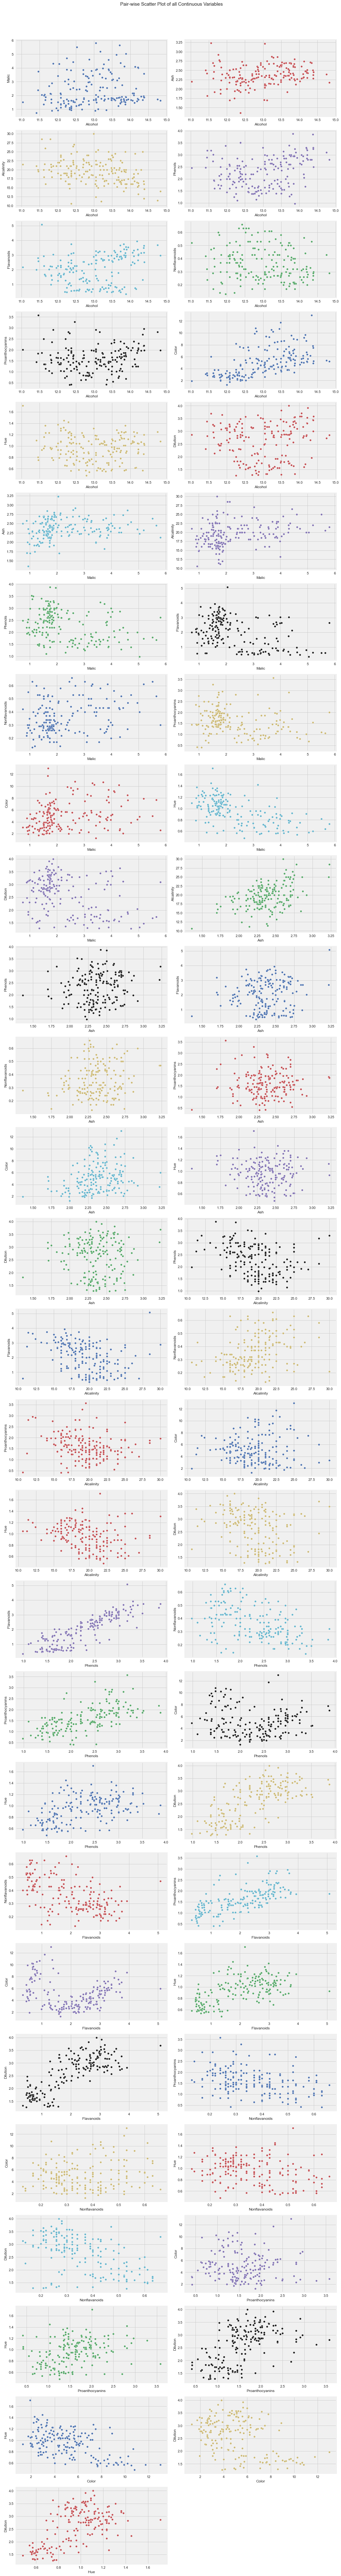

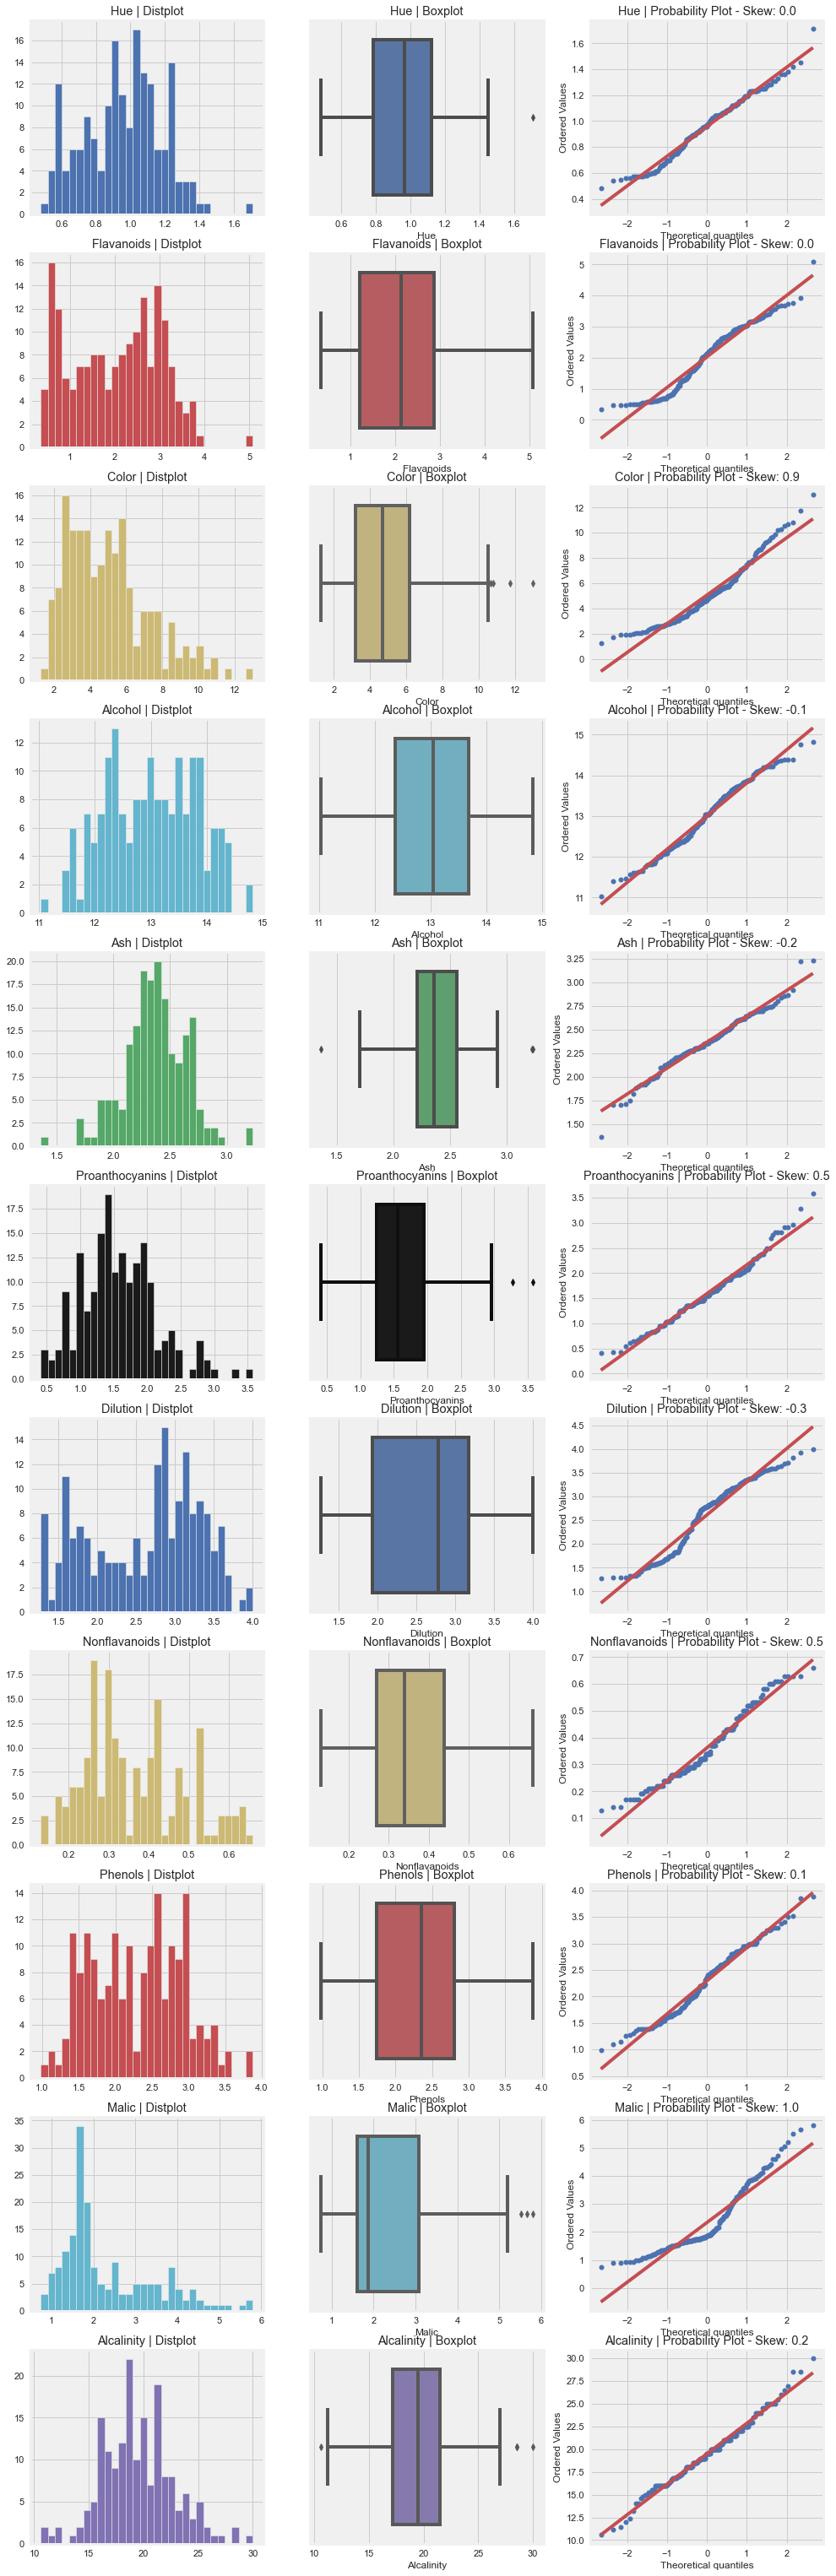

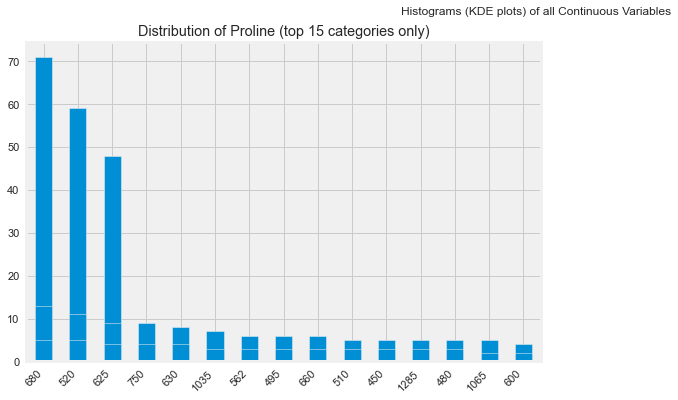

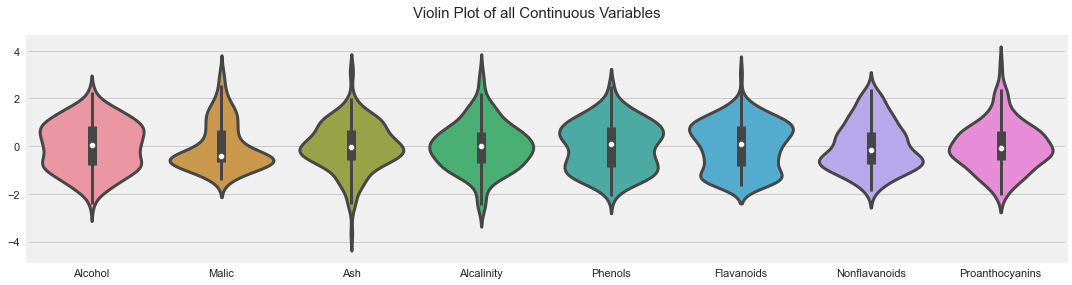

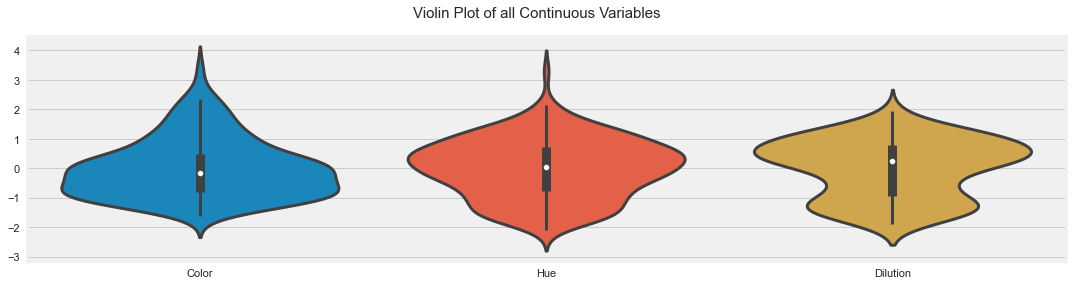

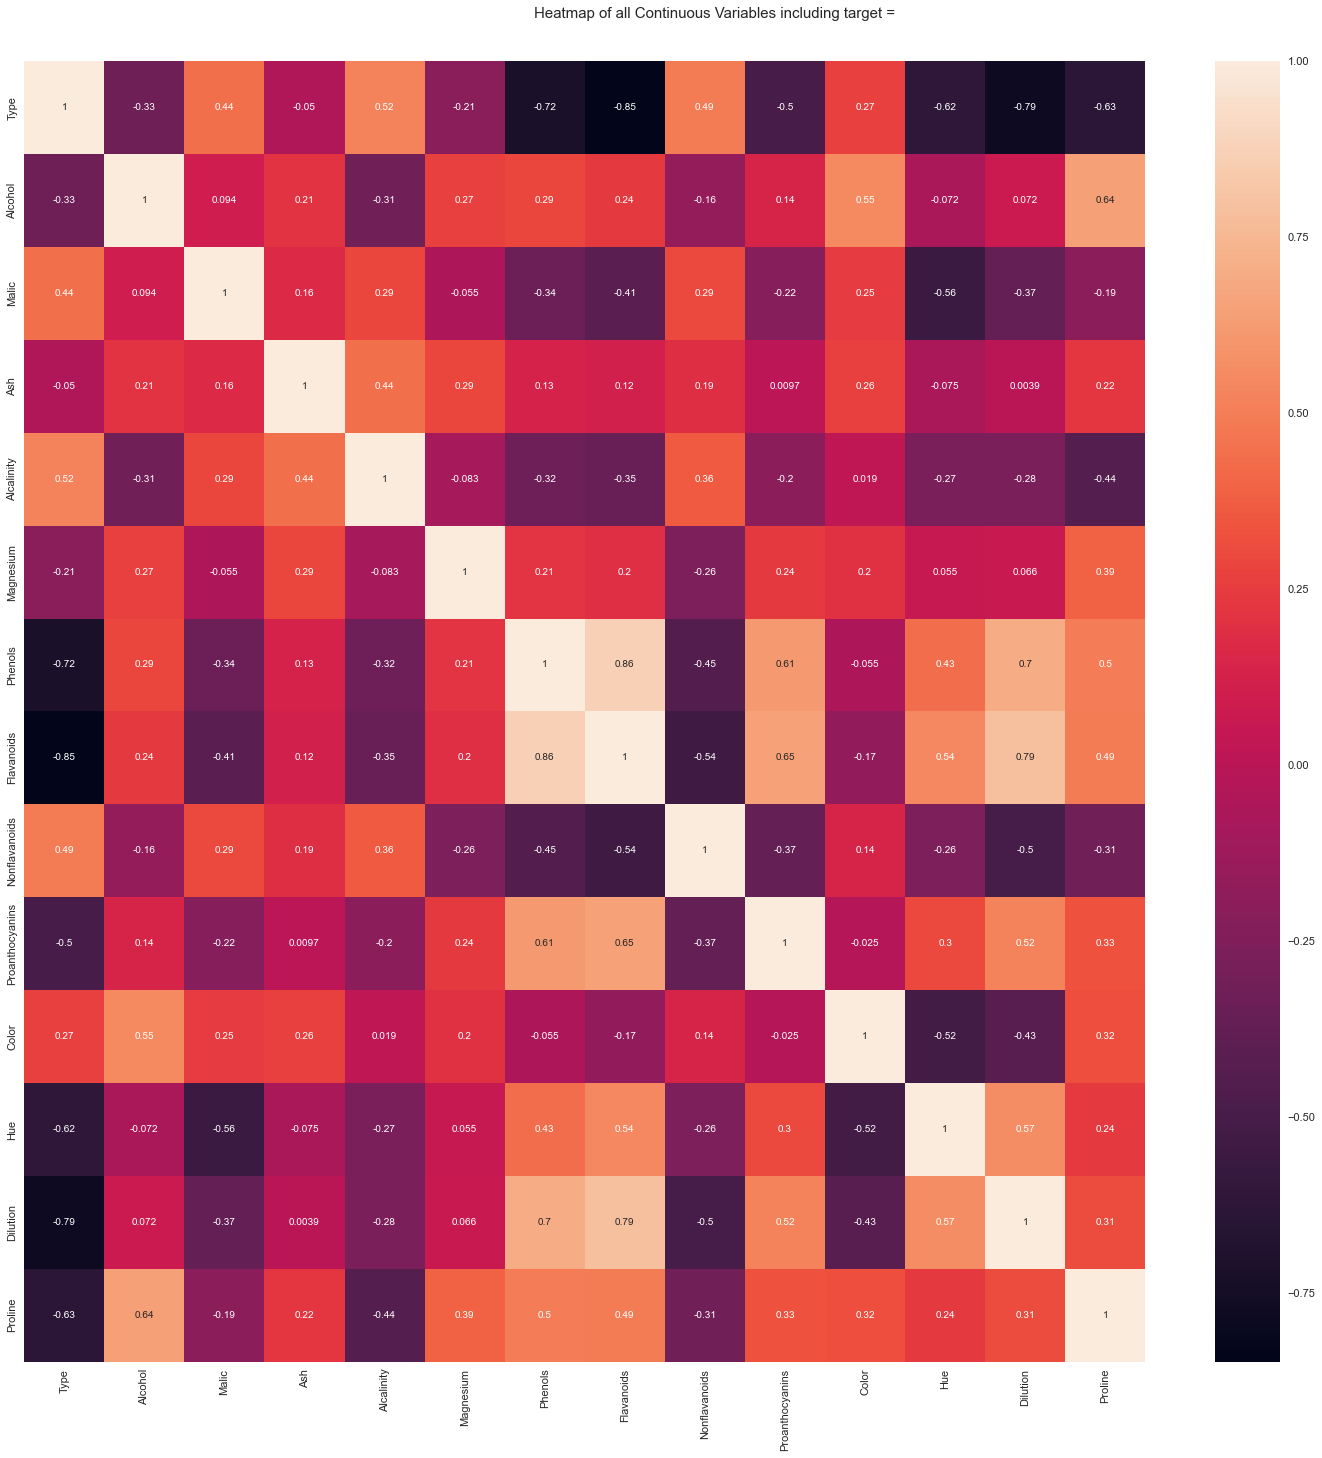

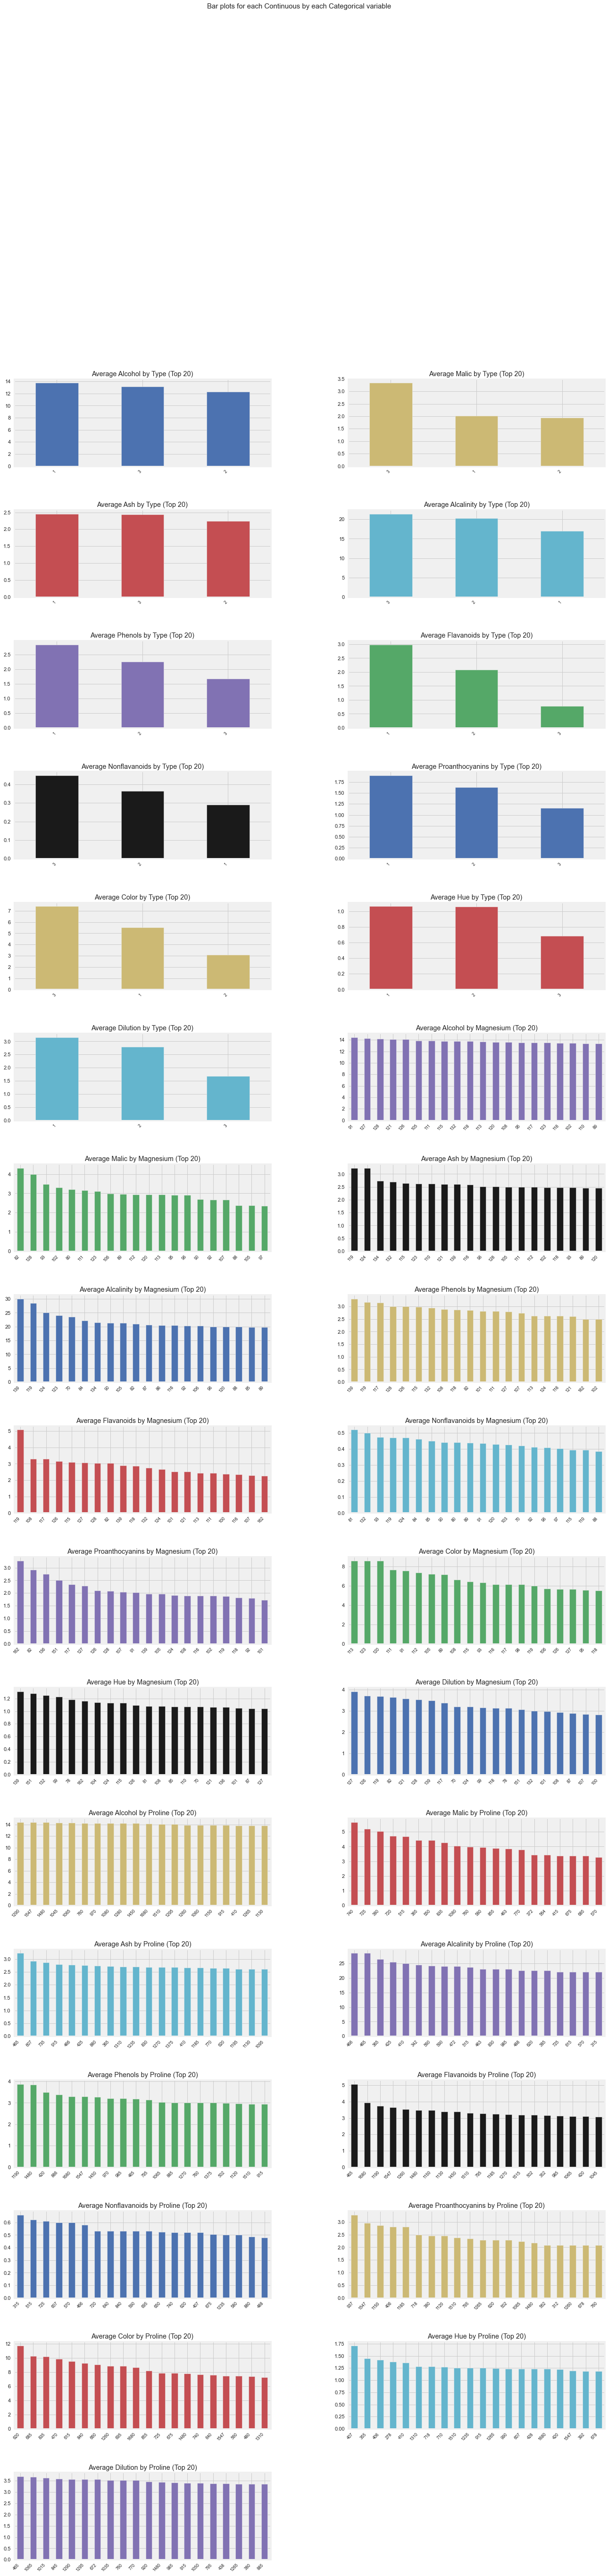

All Plots done
Time to run AutoViz = 19 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
filename = "C:\\Users\\kalpana\\Downloads\\wine.csv"
dft=AV.AutoViz(
filename
)

In [18]:
dft

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [20]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [25]:
Q1=dft['Color'].quantile(0.25)
Q3=dft['Color'].quantile(0.75)
IQR=Q3-Q1
Whisker_width=1.5
lower_wisker=Q1-(Whisker_width*IQR)
upper_wisker=Q3+(Whisker_width*IQR)
dft['Color']=np.where(dft['Color']>upper_wisker,upper_wisker,np.where(dft['Color']<lower_wisker,lower_wisker,dft['Color']))



<AxesSubplot:xlabel='Color'>

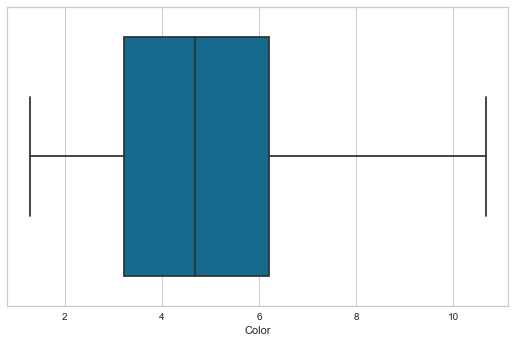

In [26]:
sns.boxplot(dft['Color'],data=dft)

In [27]:
Q1=dft['Malic'].quantile(0.25)
Q3=dft['Malic'].quantile(0.75)
IQR=Q3-Q1
Whisker_width=1.5
lower_wisker=Q1-(Whisker_width*IQR)
upper_wisker=Q3+(Whisker_width*IQR)
dft['Malic']=np.where(dft['Malic']>upper_wisker,upper_wisker,np.where(dft['Malic']<lower_wisker,lower_wisker,dft['Malic']))



<AxesSubplot:xlabel='Malic'>

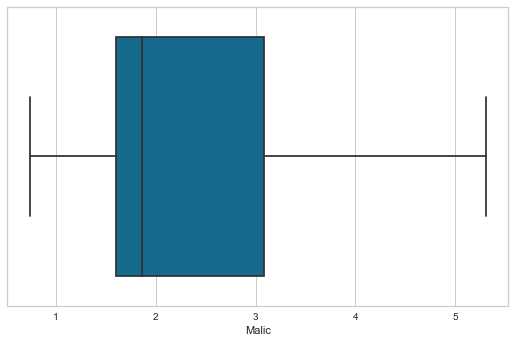

In [28]:
sns.boxplot(dft['Malic'],data=dft)

In [29]:
Q1=dft['Alcalinity'].quantile(0.25)
Q3=dft['Alcalinity'].quantile(0.75)
IQR=Q3-Q1
Whisker_width=1.5
lower_wisker=Q1-(Whisker_width*IQR)
upper_wisker=Q3+(Whisker_width*IQR)
dft['Alcalinity']=np.where(dft['Alcalinity']>upper_wisker,upper_wisker,np.where(dft['Alcalinity']<lower_wisker,lower_wisker,dft['Alcalinity']))



<AxesSubplot:xlabel='Alcalinity'>

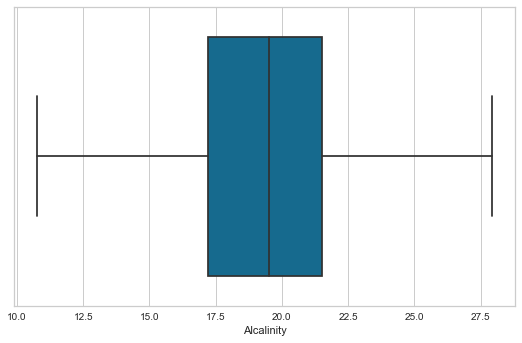

In [30]:
sns.boxplot(dft['Alcalinity'],data=dft)

In [32]:
dft.drop(labels=['Type'],axis=1,inplace=True)

In [33]:
dft.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Normalization function 

In [35]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(dft.iloc[:,0:])

In [36]:
df1

array([[ 1.51861254, -0.56553422,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.50172839, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02694849,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.77705125, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.23659622,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.61297912,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [37]:
df1 = pd.DataFrame(data=df1, columns = ['Alcohol','Malic','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color','Hue','Dilution','Proline'])
df1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.565534,0.232053,-1.182882,1.913905,0.808997,1.034819,-0.659563,1.224884,0.266954,0.362177,1.847920,1.013009
1,0.246290,-0.501728,-0.827996,-2.524956,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.291923,0.406051,1.113449,0.965242
2,0.196879,0.026948,1.109334,-0.267832,0.088358,0.808997,1.215533,-0.498407,2.135968,0.284696,0.318304,0.788587,1.395148
3,1.691550,-0.346771,0.487926,-0.816862,0.930918,2.491446,1.466525,-0.981875,1.032155,1.225029,-0.427544,1.184071,2.334574
4,0.295700,0.236596,1.840403,0.464208,1.281985,0.808997,0.663351,0.226796,0.401404,-0.318536,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.709072,0.305159,0.311700,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.180674,-1.392758,-1.231206,-0.021952
174,0.493343,1.439792,0.414820,1.074241,0.158572,-0.793334,-1.284344,0.549108,-0.316950,1.003253,-1.129518,-1.485445,0.009893
175,0.332758,1.777051,-0.389355,0.159191,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.289557,-1.612125,-1.485445,0.280575
176,0.209232,0.236596,0.012732,0.159191,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.890359,-1.568252,-1.400699,0.296498


# PCA CLUSTRING

In [38]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca_df=pca.fit_transform(df1)
df2 = pd.DataFrame(data=pca_df, columns = ['components1','components2','components3'])
df2

,components1,components2,components3
0,3.320111,-1.456747,-0.149769
1,2.230866,0.306740,-2.034526
2,2.508905,-1.033665,1.008746
3,3.751565,-2.780379,-0.146589
4,0.996770,-0.858994,2.050649
...,...,...,...
173,-3.313278,-2.180956,-0.351628
174,-2.622423,-1.775750,0.220941
175,-2.693964,-2.811969,-0.944732
176,-2.394101,-2.326254,-0.554447


In [39]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36323902, 0.19292084, 0.11090169])

In [40]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([36.32, 55.61, 66.7 ])

In [41]:
pca.components_

array([[ 0.14374782, -0.24671315, -0.00297014, -0.24502805,  0.14156338,
         0.39400463,  0.42203825, -0.29783473,  0.31284654, -0.08877644,
         0.29643347,  0.375468  ,  0.2858614 ],
       [-0.4832617 , -0.2285426 , -0.3114722 ,  0.01716101, -0.30047187,
        -0.06301642,  0.0028265 , -0.0251228 , -0.03506506, -0.53121382,
         0.27726778,  0.1641229 , -0.36714028],
       [-0.19899221,  0.09249695,  0.63321692,  0.60550126,  0.12912427,
         0.14897777,  0.15189812,  0.17281262,  0.15369471, -0.14087532,
         0.08097996,  0.16598204, -0.12194493]])

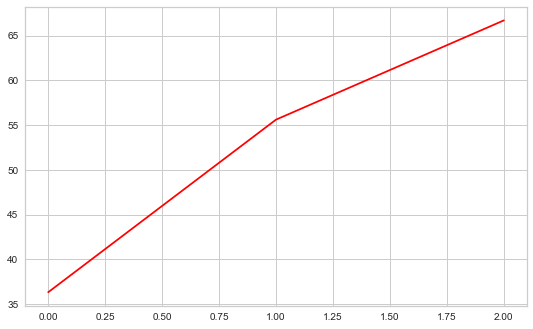

In [42]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

# K-mean

In [43]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(df2)

KMeans(n_clusters=3, random_state=42)

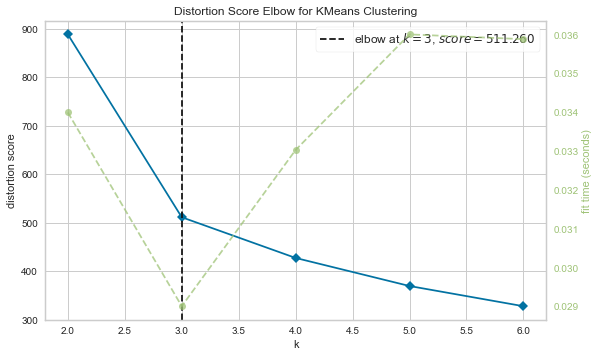

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(KMeans(),k=6)
visualizer.fit(df2)
visualizer.show()

In [45]:
clusters_new.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [47]:
#Assign clusters to the data set
df2['Kmeans'] = clusters_new.labels_

In [48]:
df2.head()

,components1,components2,components3,Kmeans
0,3.320111,-1.456747,-0.149769,1
1,2.230866,0.306740,-2.034526,1
2,2.508905,-1.033665,1.008746,1
3,3.751565,-2.780379,-0.146589,1
4,0.996770,-0.858994,2.050649,1


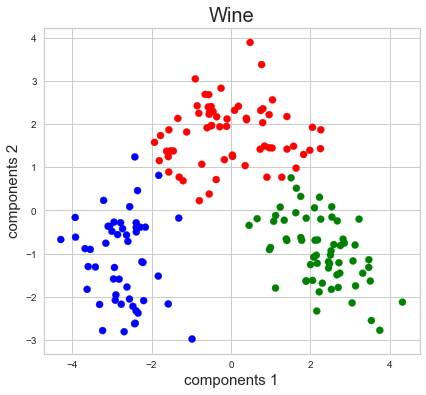

In [50]:
fig =plt.figure(figsize =(6,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('components 1',fontsize=15)
ax.set_ylabel('components 2',fontsize=15)
ax.set_title('Wine',fontsize=20)
color_theme =np.array(["blue","green","red"])
ax.scatter(x=df2.components1,y=df2.components2,c=color_theme[df2.Kmeans],s=50)
plt.show()

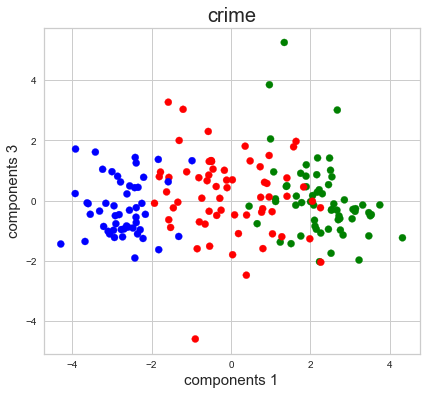

In [53]:
fig =plt.figure(figsize =(6,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('components 1',fontsize=15)
ax.set_ylabel('components 3',fontsize=15)
ax.set_title('crime',fontsize=20)
color_theme =np.array(["blue","green","red"])
ax.scatter(x=df2.components1,y=df2.components3,c=color_theme[df2.Kmeans],s=50)
plt.show()

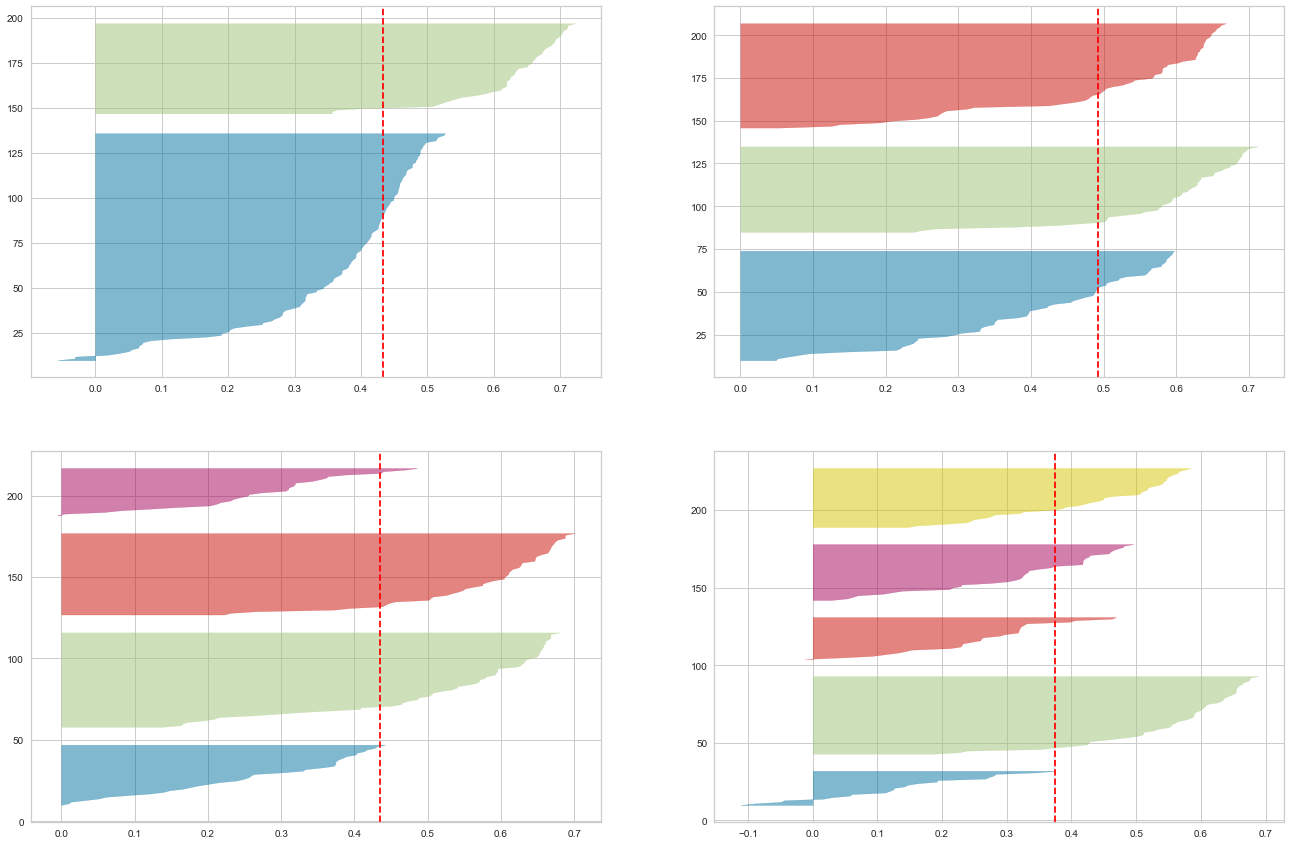

In [54]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(20,15))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df2) 

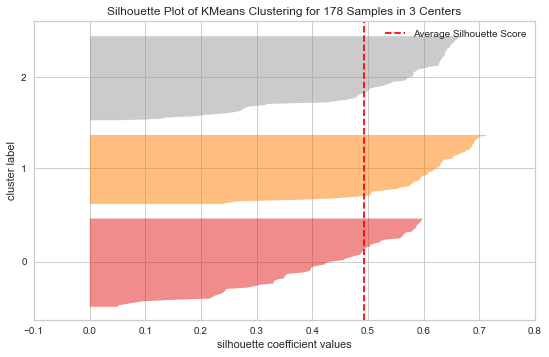

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 178 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [57]:
model_clust = KMeans(n_clusters = 3, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_clust)
sil_visualizer.fit(df2)    
sil_visualizer.show()

# Run Hierarchical Clustering.(Agglomerative Clustering)

In [59]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
y_pred_hie = agg_clustering.fit_predict(df2)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [60]:
# Cluster numbers

agg_clustering.n_clusters_

3

In [62]:
# Clustering Score

(silhouette_score(df2, agg_clustering.labels_)*100).round(3)

41.064

In [63]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(df1)
        silhouette_score1 = silhouette_score(df1, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.2670905362389989
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.043745222893523526
For n_clusters = 2 The average silhouette_score with linkage- average : 0.29394277811654085
For n_clusters = 2 The average silhouette_score with linkage- single : 0.22269169979531941

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.27642462603774043
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.13729836063155648
For n_clusters = 3 The average silhouette_score with linkage- average : 0.19553956314403803
For n_clusters = 3 The average silhouette_score with linkage- single : 0.20403628210452493

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.21642283414156774
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.18531522489750457
For n_clusters = 4 The average silhouette_score with linkage- average : 0.158950530453

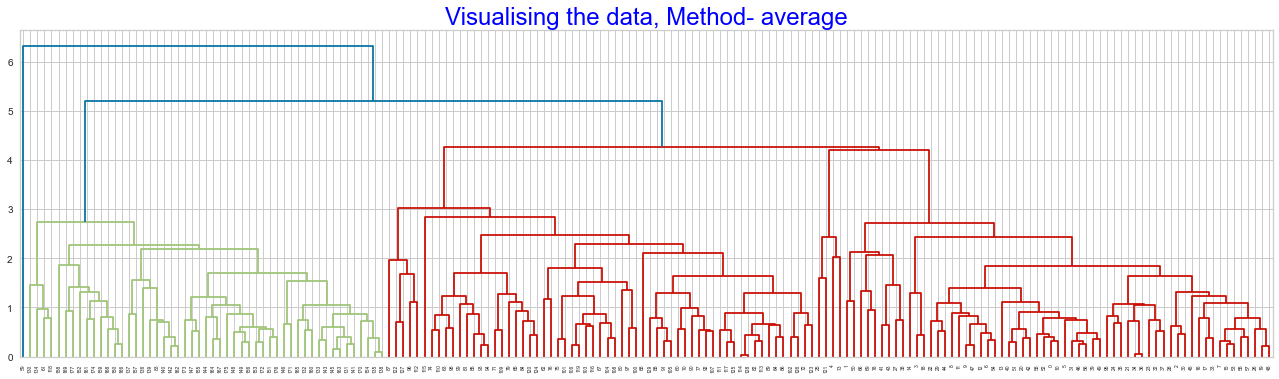

In [65]:
import scipy.cluster.hierarchy as shc
for methods in ['average']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram2 = shc.dendrogram(shc.linkage(df2, method = methods,optimal_ordering=False))

# Putting Cluster lables into original dataset And analysis of the same

In [66]:
hie_cluster = pd.DataFrame(agg_clustering.labels_.copy(), columns=['Hie_Clustering'])

In [68]:
df3 = pd.concat([dft.copy(),hie_cluster], axis=1)
df3 .head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Hie_Clustering
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [70]:
y=pd.DataFrame(clusters_new.labels_.copy(), columns=['Kmeans'])
df4 = pd.concat([dft.copy(),y], axis=1)
df4 .head()


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


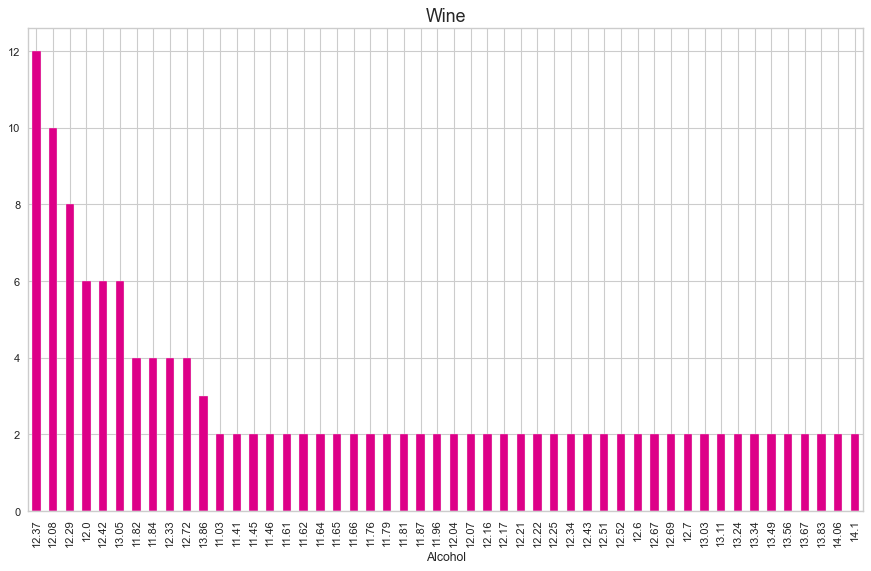

In [71]:
wine=df4.groupby("Alcohol")["Kmeans"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
wine.plot.bar(color="#dd0088")
plt.title("Wine",fontsize=16)
plt.show()

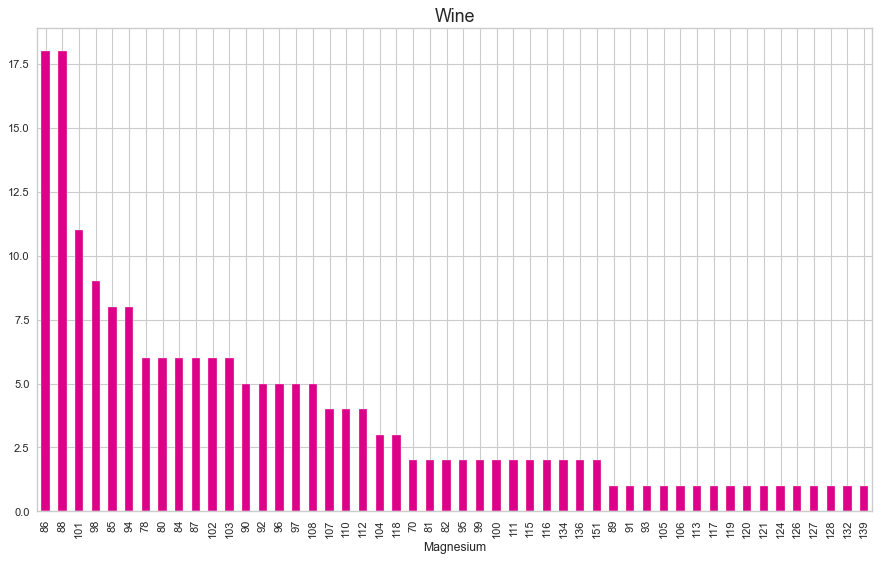

In [72]:
wine=df4.groupby("Magnesium")["Kmeans"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
wine.plot.bar(color="#dd0088")
plt.title("Wine",fontsize=16)
plt.show()

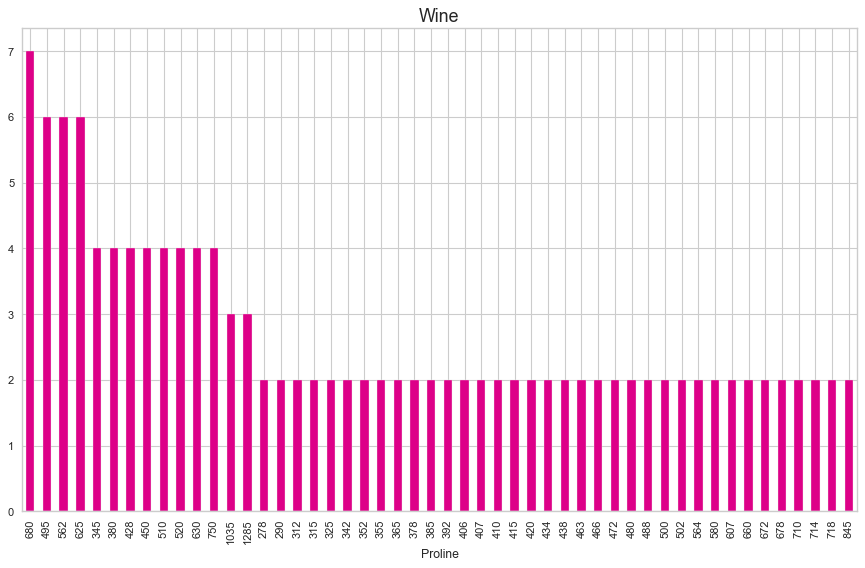

In [73]:
wine=df4.groupby("Proline")["Kmeans"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
wine.plot.bar(color="#dd0088")
plt.title("Wine",fontsize=16)
plt.show()

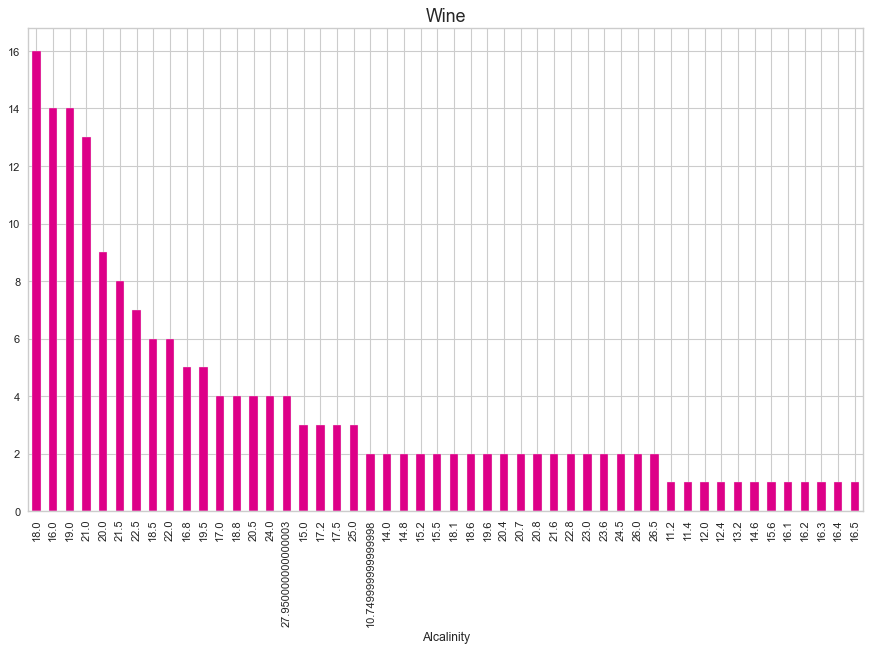

In [74]:
wine=df4.groupby("Alcalinity")["Kmeans"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
wine.plot.bar(color="#dd0088")
plt.title("Wine",fontsize=16)
plt.show()

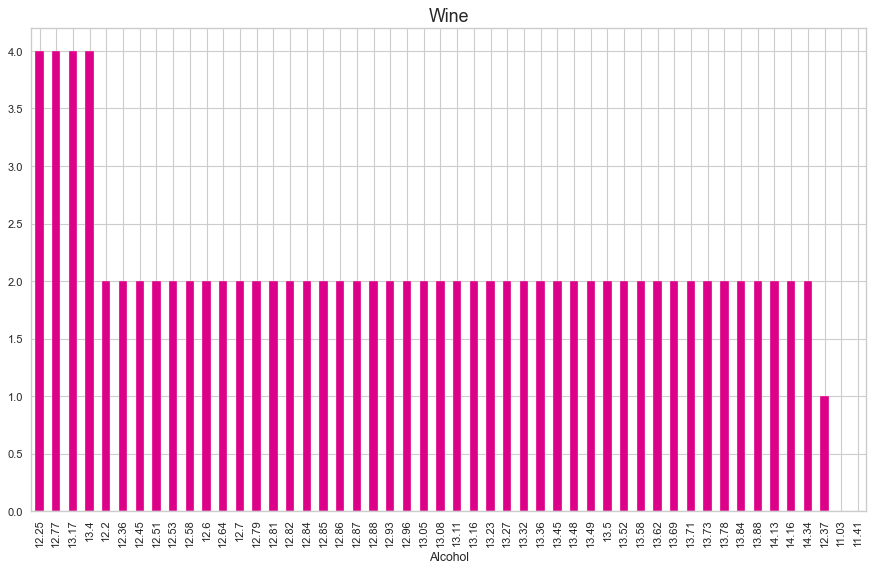

In [75]:
wine=df3.groupby("Alcohol")["Hie_Clustering"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
wine.plot.bar(color="#dd0088")
plt.title("Wine",fontsize=16)
plt.show()

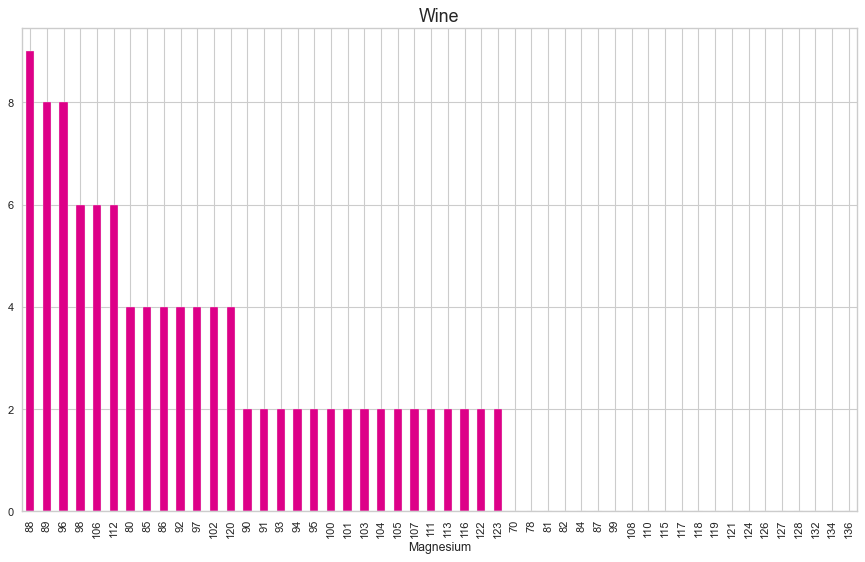

In [77]:
wine=df3.groupby("Magnesium")["Hie_Clustering"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
wine.plot.bar(color="#dd0088")
plt.title("Wine",fontsize=16)
plt.show()

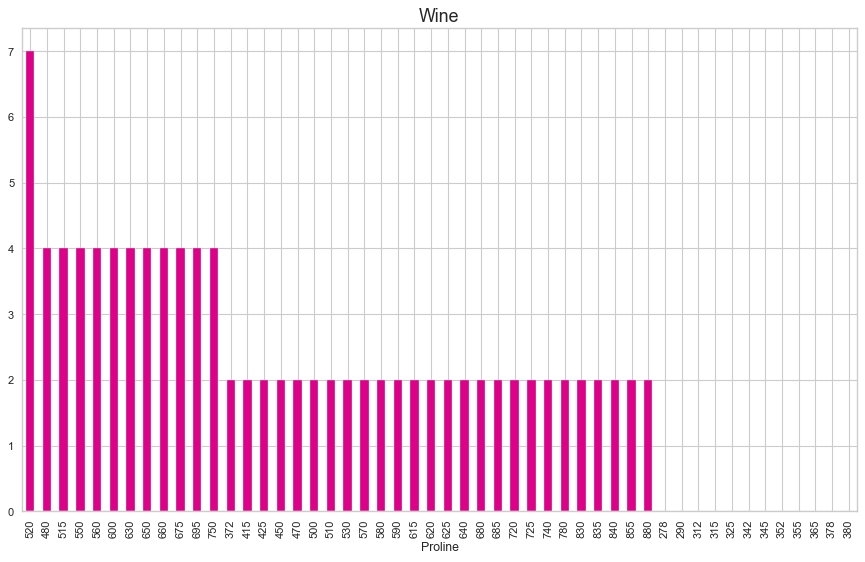

In [78]:
wine=df3.groupby("Proline")["Hie_Clustering"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
wine.plot.bar(color="#dd0088")
plt.title("Wine",fontsize=16)
plt.show()